In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("../data/interim/data.csv")


In [7]:
X = df.drop("LOAN_DEFAULT" , axis = 1)
y = df["LOAN_DEFAULT"]

X_train , X_val , y_train , y_val = train_test_split(X, y, test_size = 0.2, random_state=7)

In [13]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train , y_train)
print(f"KNN train score: {model.score(X_train , y_train)}")
print(f"KNN validation score:{model.score(X_val , y_val)}")
y_pred = model.predict(X_val)
cf_matrix = confusion_matrix(y_val, y_pred)


# code by Dennis T from Medium.com (https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.show()

KNN train score: 0.8322969586906048


KeyboardInterrupt: 

Logistic train score: 0.7789763453713707
Logistic validation score: 0.7814353363063767
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     34000
           1       0.00      0.00      0.00      9502

    accuracy                           0.78     43502
   macro avg       0.39      0.50      0.44     43502
weighted avg       0.61      0.78      0.69     43502



/home/abdulium/miniconda3/envs/t5/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


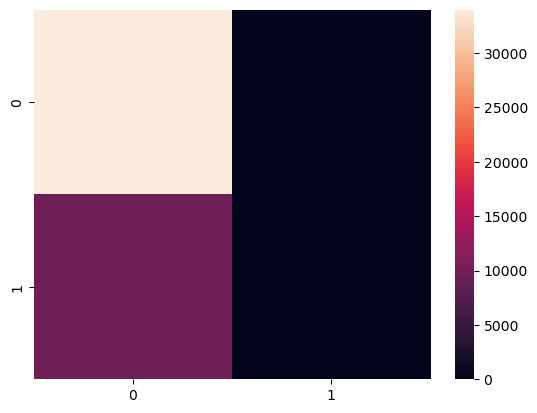

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(f"Logistic train score: {model.score(X_train , y_train)}")
print(f"Logistic validation score: {model.score(X_val , y_val)}")
y_pred = model.predict(X_val)
cf_matrix = confusion_matrix(y_val, y_pred)


# code by Dennis T from Medium.com (https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.show()